### Step 1: Set Up Your Environment
Make sure you have the necessary libraries installed. Run the following commands in a notebook cell if you haven't installed them yet:

In [19]:
!pip install -q numpy pandas matplotlib seaborn scikit-learn

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Enable inline plotting
%matplotlib inline

### Step 3: Load the Spotify Dataset
For this example, let’s assume we have a CSV file named spotify_dataset.csv. You can load it using pandas:

In [5]:
# Load the Spotify dataset
spotify_data = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

# Display the dataset
spotify_data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### Step 4: Data Exploration
Explore the dataset with some basic functions:

In [4]:
# Get basic statistics
print(spotify_data.describe())

# Check for missing values
print(spotify_data.isnull().sum())

# Display the columns
print(spotify_data.columns)

          Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -1

### Step 5: Create Visualizations
Now, let's create some visualizations to analyze the data. A histogram can help visualize the distribution of song popularity. We can see that this dataset is skewed toward less popular music, which is something to be aware of when further investigating this dataset.

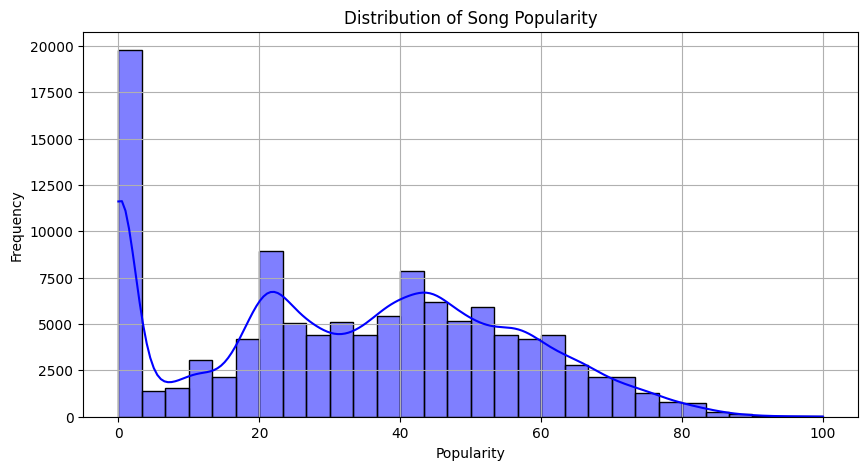

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(spotify_data['popularity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#### Assuming we have a genre column, we can create a box plot to visualize the distribution of danceability across different genres.

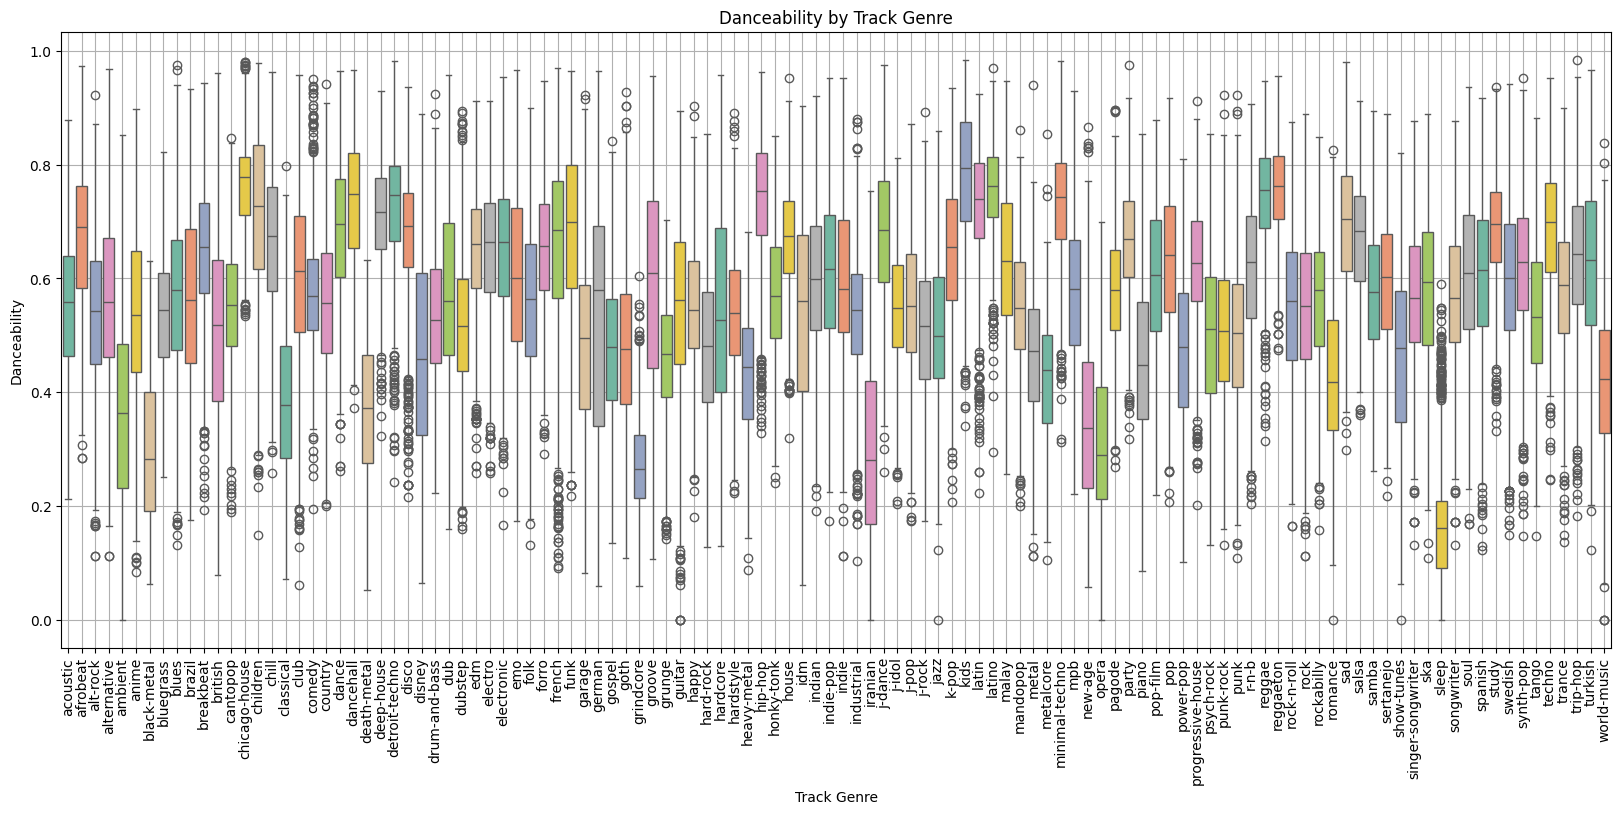

In [35]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='track_genre', y='danceability', data=spotify_data, palette='Set2', hue='track_genre')
plt.title('Danceability by Track Genre')
plt.xlabel('Track Genre')
plt.ylabel('Danceability')

tick_labels = spotify_data['track_genre'].unique()
plt.xticks(ticks=np.arange(len(tick_labels)), labels=tick_labels, rotation=90)

plt.grid()
plt.show()

### Step 6: Cluster the Data
Next, let's use K-Means clustering to describe the data in clusters of relatively similar songs based on the following attributes:
- **Danceability**
    - How suitable a track is for dancing, determined by tempo, rhythm stability, and overall beat strength. Higher values indicate tracks that are more danceable
- **Energy**
    - The intensity and activity level of a track. High energy tracks feel fast, loud, and chaotic, while low energy tracks are more subdued and calm
- **Loudness**
    - The overall volume of a track, measured in decibels (dB). This attribute indicates how loud or soft a track is, with higher values indicating louder tracks
- **Valence**
    - A measure of musical positiveness conveyed by a track. Higher valence values indicate a more positive, happy sound, while lower values suggest a more negative, sad sounds

#### We begin by performing the "Elbow Method" to determine the optimal # of clusters for the dataset 

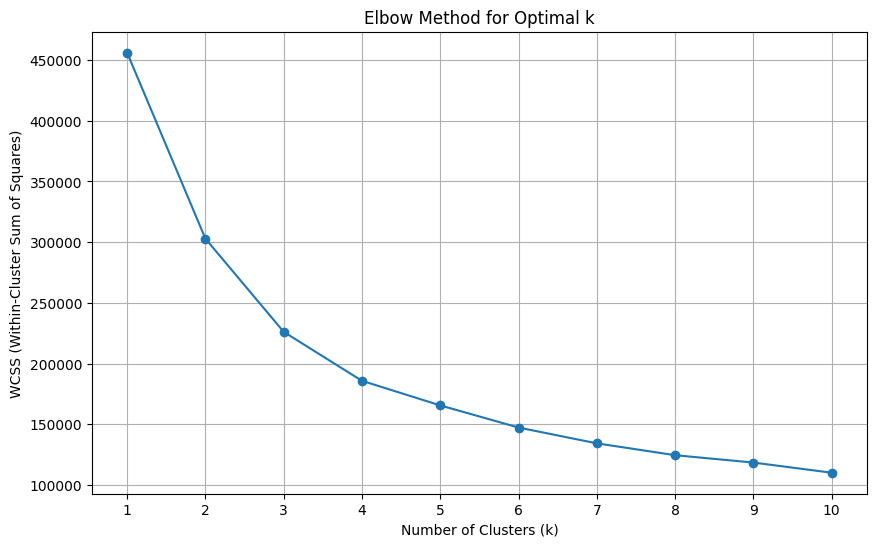

In [28]:
# Set the range of k values to test
k_values = range(1, 11)  # Testing k from 1 to 10
wcss = []  # List to hold the WCSS values

# Loop over the range of k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)  # Use the standardized features
    wcss.append(kmeans.inertia_)  # Append the WCSS value

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_values)
plt.grid()
plt.show()

#### Once we've found the optimal k-value, we can normalize the data and fit it to a K-Means model

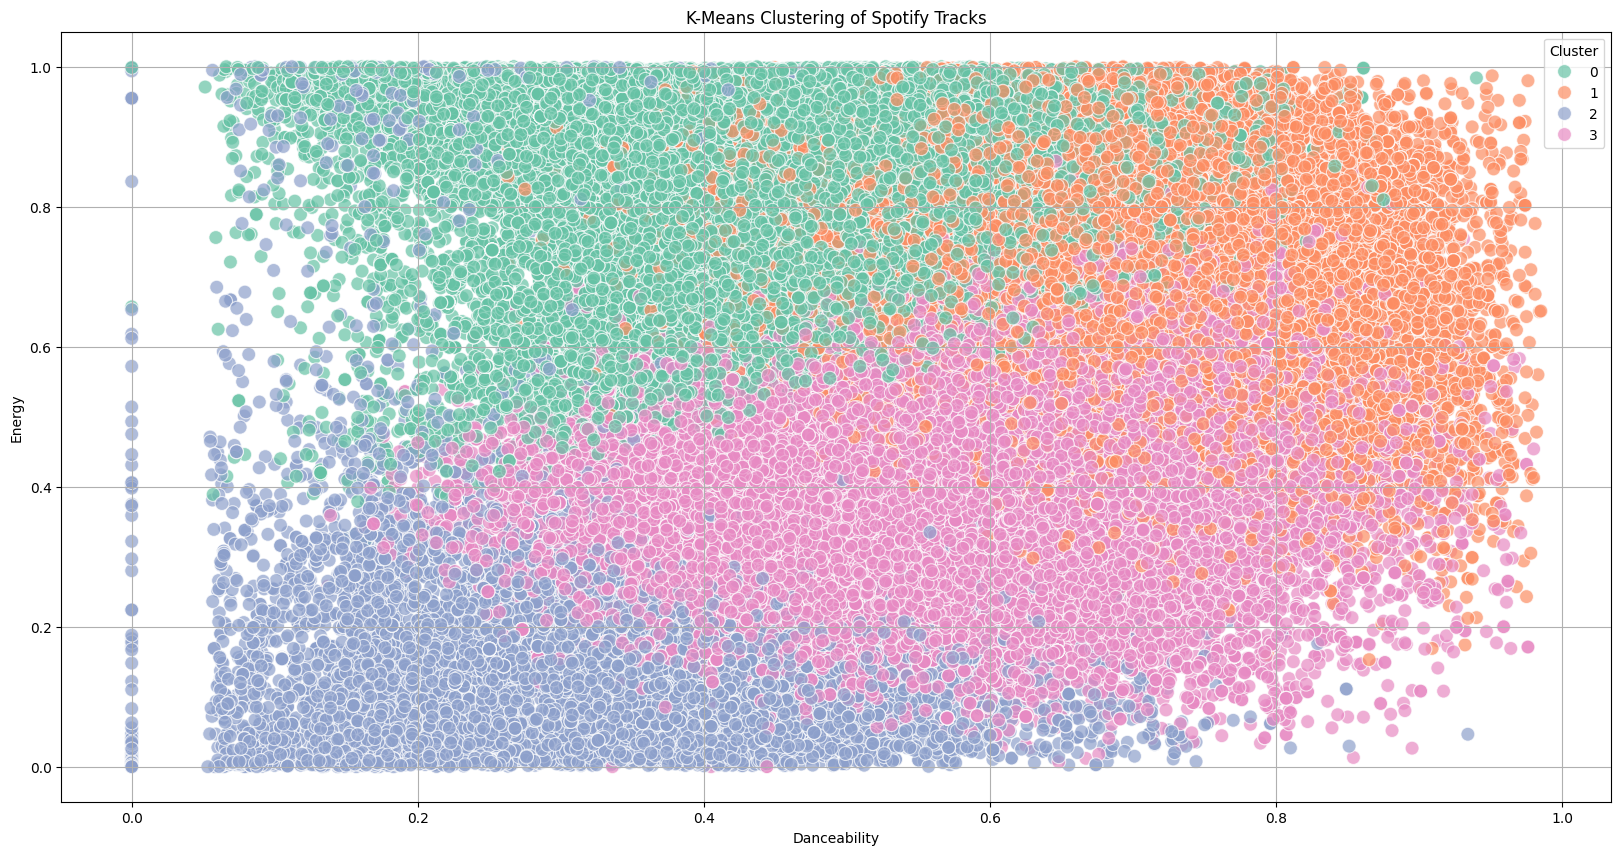

In [31]:
# Select relevant features
features = spotify_data[['danceability', 'energy', 'loudness', 'valence']]

# Check for any missing values and drop them
features = features.dropna()

# Normalize the data ranges
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Set the number of clusters
k = 4  # Determined from the Elbow-method plot above

# Fit K-Means
kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the original dataset
spotify_data['Cluster'] = clusters

plt.figure(figsize=(20, 10))
sns.scatterplot(data=spotify_data, x='danceability', y='energy', hue='Cluster', palette='Set2', s=100, alpha=0.7)
plt.title('K-Means Clustering of Spotify Tracks')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid()
plt.show()

#### Try using this K-Means model and plot as a basis to develop a simple song recommendation model. Good luck!